In [84]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math 
import random

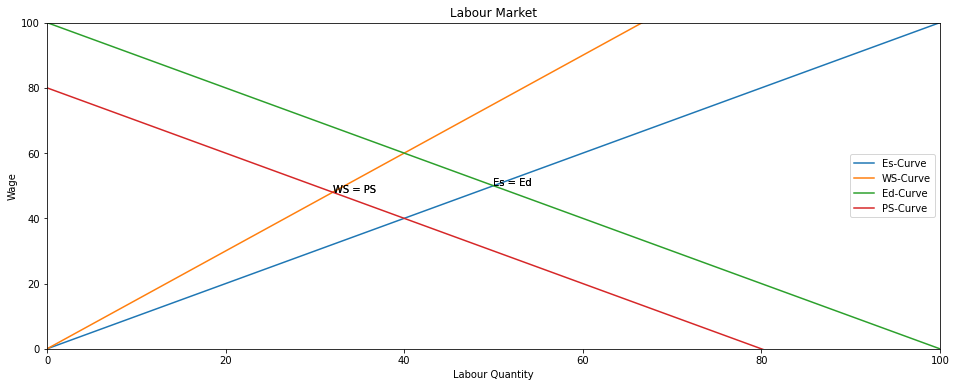

Unemployment under perfect competition: 50
Voluntary unemployment: 16
Involuntary unemployment: 52
Total unemployment: 68


In [85]:
#WS-PS Curve

def labour_supply_curve(gradient):
    wage_schedule = [] 
    for labour_amount in range(0,101):
        wage = gradient * labour_amount 
        wage_schedule.append(wage)
    return wage_schedule
    
#Wage setting curve is a markup on the labour supply curve 
def wage_setting_curve(gradient, bargaining_power):#not necessarily a parralel shift of the labour supply curve 
    wage_schedule = labour_supply_curve(gradient) 
    wage_setting_schedule = [] 
    for wage_val in wage_schedule:
        wage_setting_schedule.append(wage_val * bargaining_power)
    return wage_setting_schedule

#defined by the marginal product of labour - demand increases if worker productivity increases
def labour_demand_curve(labour_productivity):
    wage_schedule = []
    y_intercept = 100
    for labour_amount in range(0,101):
        wage = -(labour_amount * labour_productivity) + y_intercept 
        wage_schedule.append(wage)
    return wage_schedule

#below the labour demand curve, real wage is below MPL due to firms' market power 
def price_setting_curve(labour_productivity, market_power):
    wage_schedule = labour_demand_curve(labour_productivity)
    price_setting_schedule = []
    for wage in wage_schedule:
        price_setting_schedule.append(wage-market_power)
    return price_setting_schedule 


gradient = 1 
bargaining_power = 1.5
labour_productivity = 1
market_power = 20

plt.figure(figsize=(16,6))
plt.title("Labour Market")
plt.xlabel("Labour Quantity")
plt.ylabel("Wage")
plt.xlim(0,100)
plt.ylim(0,100)

a = labour_supply_curve(gradient)
plt.plot(a, label='Es-Curve')
b = wage_setting_curve(gradient, bargaining_power)
plt.plot(b,label='WS-Curve')
c = labour_demand_curve(labour_productivity)
plt.plot(c, label='Ed-Curve')
d = price_setting_curve(labour_productivity, market_power)
plt.plot(d, label='PS-Curve')
plt.legend()



for pos_b, val_b in enumerate(b):
    for pos_d, val_d in enumerate(d):
        if val_b == val_d and pos_b == pos_d:        
            plt.annotate("WS = PS", (pos_b, val_b))
            imperfect_comp_labour_demand = pos_b
            imperfect_comp_wage = val_b

for pos_a, val_a in enumerate(a):
    for pos_c, val_c in enumerate(c):
        if val_a == val_c and pos_a == pos_c: 
            plt.annotate("Es = Ed", (pos_a, val_a))
            perfect_comp_labour_demand = pos_a
        if val_a == imperfect_comp_wage:
            perfect_imperfect = pos_a
            

annotate_intersections(a,b,c,d)
plt.show()

perfect_comp_unemployment = 100-perfect_comp_labour_demand#100 is total labour
print("Unemployment under perfect competition:",perfect_comp_unemployment)

#imperect_comp_wage
Voluntary_unemployment = perfect_imperfect - imperfect_comp_labour_demand
#what labour demand on the perfect competition supply schedule has wage = imperfect_comp_wage?


print("Voluntary unemployment:",Voluntary_unemployment)

Involuntary_unemployment = 100 - Voluntary_unemployment - imperfect_comp_labour_demand
print("Involuntary unemployment:",Involuntary_unemployment)
Total_unemployment = Involuntary_unemployment + Voluntary_unemployment
print("Total unemployment:",Total_unemployment)


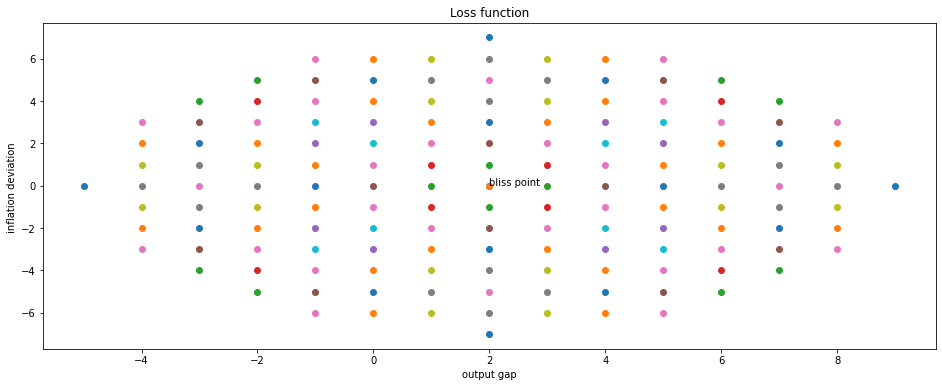

In [86]:
#The Central Bank Loss Function 

def central_bank_loss(inflation_actual,output_actual,beta):
    inflation_deviation = abs(2-inflation_actual)
    output_deviation = abs(0-output_actual)
    Loss = (inflation_deviation**2) + beta*(output_deviation**2)
    return [Loss,inflation_actual,output_actual] 

def concentric_rings(loss_check):
    beta = 1
    constant_loss_list = []
    for arbitratry_inflation_val in range(-10,10):
        for arbitrary_output_gap in range(-10,10):
            loss = central_bank_loss(arbitratry_inflation_val,arbitrary_output_gap,beta)
            if loss[0] == loss_check:
                constant_loss_list.append([loss[1], loss[2]])
    return constant_loss_list

def scatter_plot_ring(plots_list):
    plt.figure(figsize=(16, 6))
    plt.xlabel("output gap")
    plt.ylabel("inflation deviation ")
    plt.title("Loss function")
    plt.scatter(2,0)
    plt.annotate("bliss point", (2, 0))
    for n in range(0,plots_list):
        ring = concentric_rings(n)
        x_axis=[]
        y_axis=[]
        for val in ring:
            x_axis.append(val[0])
            y_axis.append(val[1])
        plt.scatter(x_axis,y_axis)
    
    plt.savefig("Diagrams/Central_Bank_Loss_Contours.png") 
    plt.show()
    #the further out the ring the 
        
    

scatter_plot_ring(50)
#inflation_deviation = inflation_target - inflation_actual
#output_gap output_equilibrium - output_actual


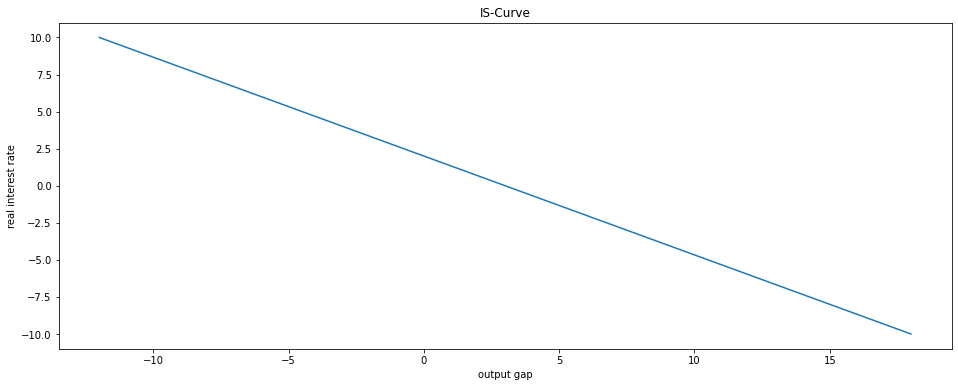

In [87]:
#The IS-PC-MR Model 

#IS-Curve 
#Output depends on expenditure - which depends on the real interest rate - 
#Should show a linear relationship

#'a' measures sensitivity to monetary policy 
def output_gap(a,interest_rate,stabilising_interest_rate):
    output_gap_value = -a*(interest_rate - stabilising_interest_rate)
    return output_gap_value

stabilising_interest_rate = 2
output_gaps = []
interest_rates = []
for x in range(-10,11):
    output_gaps.append(output_gap(1.5,x,stabilising_interest_rate))
    interest_rates.append(x)

#graph in interest_rate-output space
plt.figure(figsize=(16, 6))
plt.xlabel("output gap")
plt.ylabel("real interest rate")
plt.title("IS-Curve")
plt.plot(output_gaps,interest_rates) #x axis shows output gap, y axis show interest rate 
plt.savefig("Diagrams/IS_Curve.png") 
plt.show()

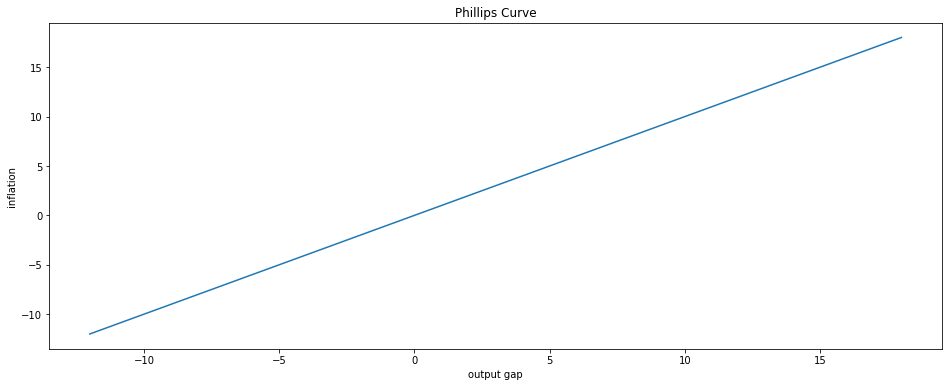

In [88]:
#Phillips-Curve 

#takes output gap sensitivity and output gap as arguments 
def calculate_inflation(alpha,output_gap):
    inflation_expectations = 3
    #create a list of inflations defined over a list of output gaps 
    inflation = alpha*(output_gap) + inflation_expectations 
    return inflation

#Phillips curve shows relationship between output gap and inflation 

def plot_phillips_curve(output_gap_range):
    inflation_vals = []
    alpha = 1.5 # sensitivity of inflation to output gap
    for output_gap in output_gap_range:
        inflation_vals.append(calculate_inflation(alpha,output_gap))
    inflation_vals.reverse()
    plt.figure(figsize=(16, 6))
    plt.ylabel("inflation")#20
    plt.xlabel("output gap")#21 
    plt.title("Phillips Curve")
    plt.plot(output_gaps,inflation_vals)
    plt.savefig("Diagrams/Phillips_Curve.png") 
    plt.show()

plotting_input = range(-10,11)
plot_phillips_curve(plotting_input)
#plot inflation against output gap 



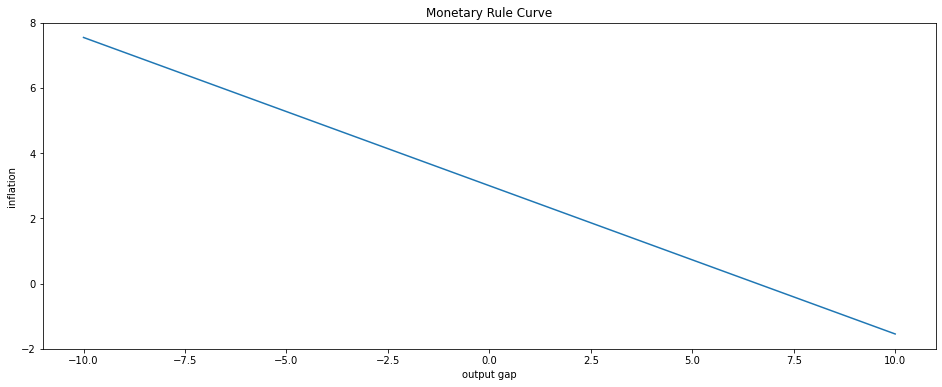

In [89]:
#Monetary-Rule-Curve

target_inflation = 3 #3%
inflation_loss_weighting = 1.1 #conservative central banker, larger values mean more inflation sensitive
sensitivity_to_monetary_policy = 2 

def calculate_inflation_given_MR_output_gap(output_gap):
    inflation = target_inflation - output_gap/(inflation_loss_weighting*sensitivity_to_monetary_policy)
    return inflation 

def plot_MR_Curve(plots):
    inflation_plots = []
    for val in plots:
        inflation_plots.append(calculate_inflation_given_MR_output_gap(val))
    plt.figure(figsize=(16, 6))
    plt.ylabel("inflation")#20
    plt.xlabel("output gap")#21
    plt.title("Monetary Rule Curve")
    plt.plot(plots,inflation_plots)
    plt.savefig("Diagrams/MR_Curve.png") 
    plt.show()    
    

plot_MR_Curve(range(-10,11))


the first two graphs show inflation given an inflationary shock 
and an inflation target. See how the price level never returns to the 
uninterrupted path



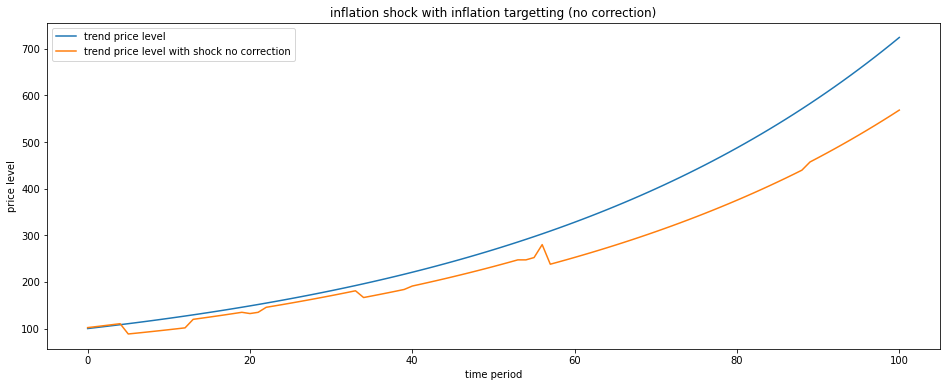

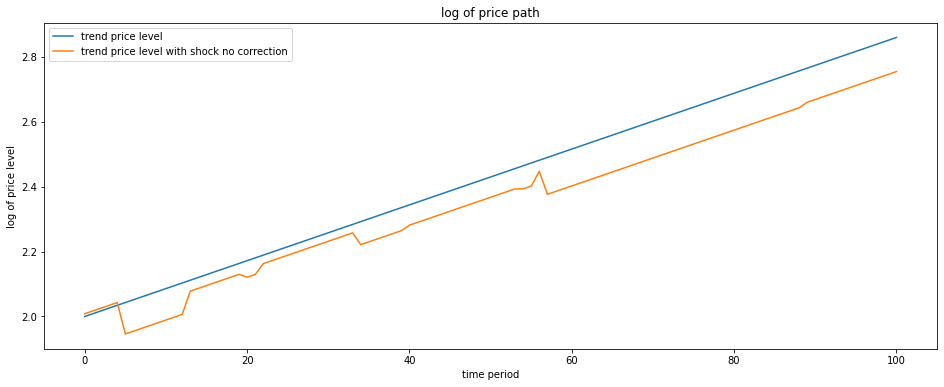

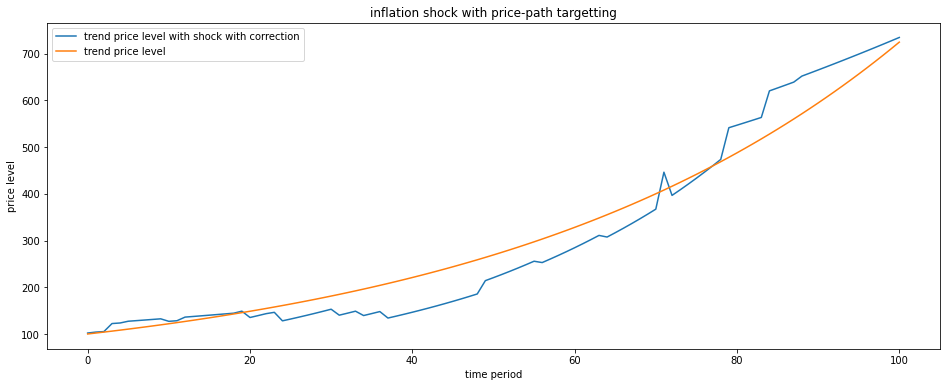

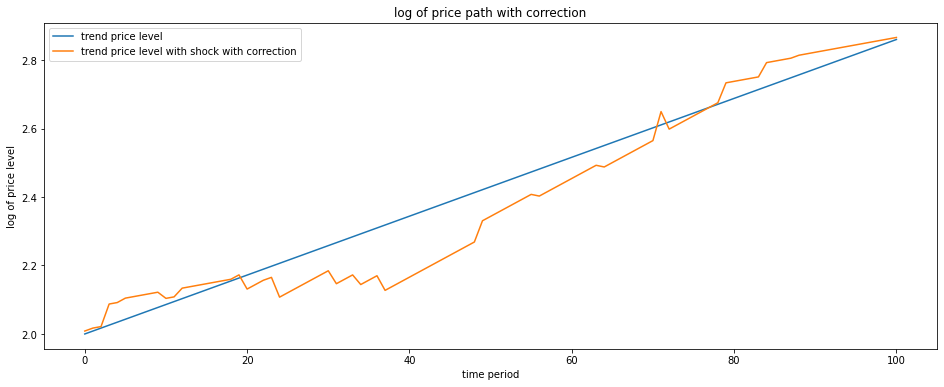

In [96]:
inflation_target = 2 #2%
price_path = 2 #2%
initial_price_level = 100

#define the optimal price path 
def calculate_price_path(inflation_target,initial_price_level):
    inflation = inflation_target/100
    price_levels = []
    for time_period in range(0,101):
        price_levels.append(initial_price_level*((1+inflation)**time_period))
    return price_levels

def inflation_targetting_with_shock(inflation_target,price_level,time_period):
    if time_period <= 100:
        normal_inflation = inflation_target/100
        shock_chance = random.random()
        if shock_chance > 0.9:
            shock = True
            shock_value = random.randint(-20,20)
        else:
            shock = False 

        if shock == False:
            price_level = price_level * (1+normal_inflation)
        elif shock == True:
            price_level = price_level * (1+(shock_value/100))
        
        price_levels.append(price_level)
        inflation_targetting_with_shock(inflation_target,price_level,time_period+1)

def price_path_targetting_with_shock(inflation_target, price_level,time_period):
    target_price_path = calculate_price_path(inflation_target,100)
    #returns a list, defines a benchmark
    #the inflation shock leads to deviation from the benchmark which needs to be returned to 
    
    if time_period <= 100:
        normal_inflation = inflation_target/100
        shock_chance = random.random()
        if shock_chance > 0.9: #period in which the shock occurs 
            shock = True
            shock_value = random.randint(-20,20)
        else:
            shock = False 
        
        correction = 1/100
        
        if price_level == target_price_path[time_period]:
            price_level *= (1+normal_inflation)
            inflation_vals.append(normal_inflation)
        elif price_level > target_price_path[time_period]:
            price_level *= (1+(normal_inflation-correction))
            inflation_vals.append(normal_inflation-correction)
        elif price_level < target_price_path[time_period]:
            price_level *= (1+(normal_inflation+correction))
            inflation_vals.append(normal_inflation+correction)
        

        if shock == True:
            price_level = price_level * (1+(shock_value/100))
            
        price_path_levels.append(price_level)
        price_path_targetting_with_shock(inflation_target,price_level,time_period+1)

    
#define a linear relationship by taking logs
def log_of_price_path(price_levels_):
    logof_price_level = []
    for price_level in price_levels_:
        logof_price_level.append(math.log(price_level,10))
    return logof_price_level

time_period = 0 
price_levels = []
price_path_levels = []
inflation_vals = []

print('''the first two graphs show inflation given an inflationary shock 
and an inflation target. See how the price level never returns to the 
uninterrupted path\n''')

plt.figure(figsize=(16, 6))
plt.title("inflation shock with inflation targetting (no correction)")
plt.xlabel("time period")
plt.ylabel("price level")
inflation_targetting_with_shock(2,100,time_period)
plt.plot(calculate_price_path(inflation_target,initial_price_level),label='trend price level')
plt.plot(price_levels,label='trend price level with shock no correction')
plt.legend()
plt.savefig("inflation_shock_with_inflation_targetting.png") 

plt.figure(figsize=(16, 6))
plt.title("log of price path")
plt.xlabel("time period")
plt.ylabel("log of price level")
plt.plot(log_of_price_path(calculate_price_path(inflation_target,initial_price_level)),label='trend price level')
plt.plot(log_of_price_path(price_levels),label='trend price level with shock no correction')
plt.legend()
plt.savefig("Diagrams/log_of_price_path.png") 

plt.figure(figsize=(16, 6))
plt.title("inflation shock with price-path targetting")
plt.xlabel("time period")
plt.ylabel("price level")
price_path_targetting_with_shock(2,100,time_period)
plt.plot(price_path_levels, label='trend price level with shock with correction')
plt.plot(calculate_price_path(inflation_target,initial_price_level),label='trend price level')
plt.legend()
plt.savefig("Diagrams/inflation_shock_with_price_path_targetting.png") 

plt.figure(figsize=(16, 6))
plt.title("log of price path with correction")
plt.xlabel("time period")
plt.ylabel("log of price level")
plt.plot(log_of_price_path(calculate_price_path(inflation_target,initial_price_level)),label='trend price level')
plt.plot(log_of_price_path(price_path_levels),label='trend price level with shock with correction')
plt.legend()
plt.savefig("Diagrams/log_of_price_path_with_correction.png") 

plt.show()
